In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")




# Project Understanding : 

# This project is about the predictions of species of penguin depending on their physical attributes(measurements).
# The model will helps the researchers to identify the species of new penguin by his physical attributes.


# Data Understanding : 

df = pd.read_csv("penguins_size.csv")
print(df)

print(df.info())
print("-"*100)

print(df["species"].unique())
print(df["species"].value_counts())
print("-"*100)

print(df["island"].unique())
print(df["island"].value_counts())
print("-"*100)

print(df["culmen_length_mm"].unique())
print(df["culmen_length_mm"].value_counts())
print("-"*100)

print(df["culmen_depth_mm"].unique())
print(df["culmen_depth_mm"].value_counts())
print("-"*100)

print(df["flipper_length_mm"].unique())
print(df["flipper_length_mm"].value_counts())
print("-"*100)

print(df["body_mass_g"].unique())
print(df["body_mass_g"].value_counts())
print("-"*100)

print(df["sex"].unique())
print(df["sex"].value_counts())
print("-"*100)



    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
----------------------------------------------------------------------------------------------------
       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
to

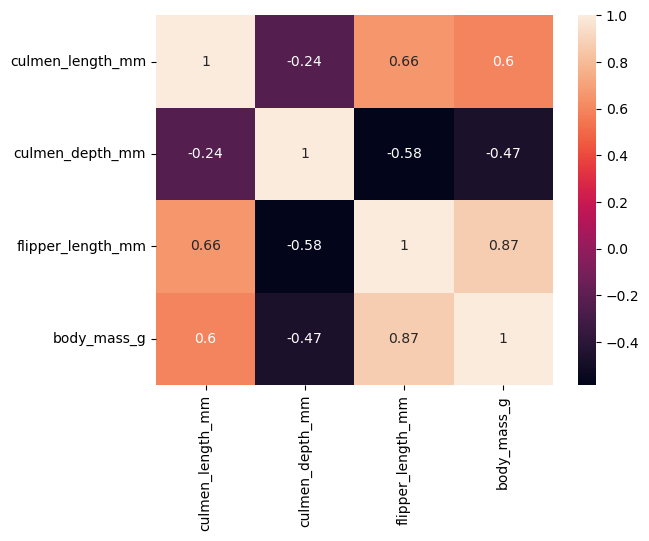

----------------------------------------------------------------------------------------------------


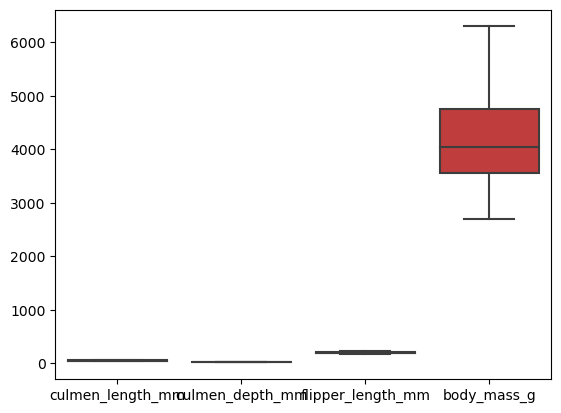

In [74]:
continous_vars = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
discrete_categoricals = ["species","island","sex"]

print(df.describe())
print("-"*100)

print(df.describe(include="all"))
print("-"*100)

sns.heatmap(df[continous_vars].corr(),annot=True)
plt.show()
print("-"*100)

sns.boxplot(df[continous_vars])
plt.show()

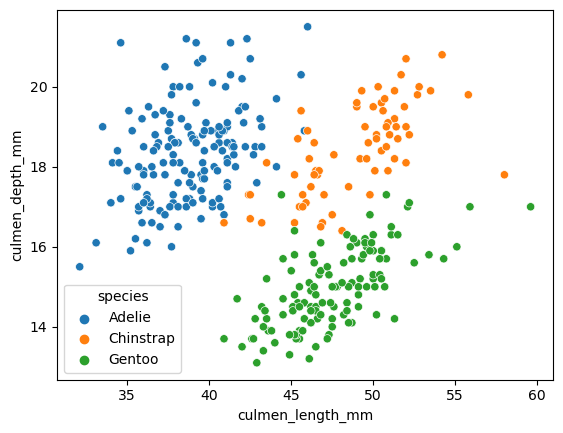

----------------------------------------------------------------------------------------------------


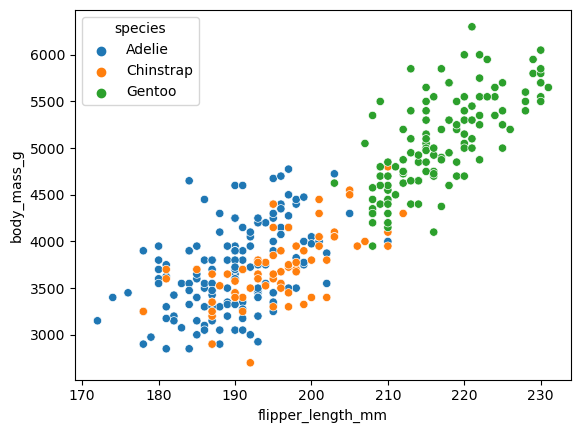

----------------------------------------------------------------------------------------------------


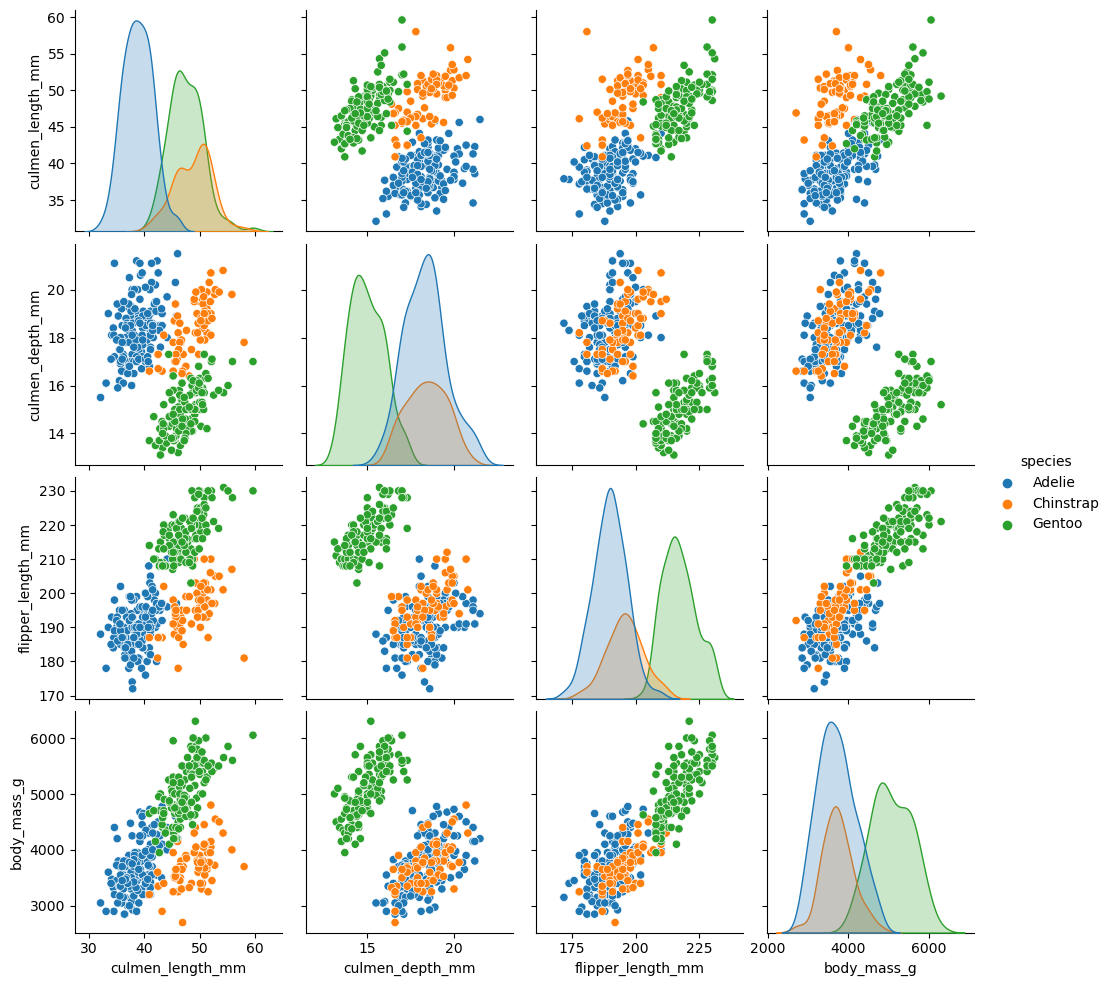

In [88]:
sns.scatterplot(x=df["culmen_length_mm"], y=df["culmen_depth_mm"],data=df,hue=df["species"])
plt.show()
print("-"*100)

sns.scatterplot(x="flipper_length_mm",y="body_mass_g",data=df,hue='species')
plt.show()
print("-"*100)

sns.pairplot(df,hue='species')
plt.show()


In [89]:
# Data Preprocessing :

# Data Cleaning : 

# check is there any data wrongly typed or not 
# Here, in this dataset there is wrong data in sex column, So we replace that wrong data with original data from original dataset.
# But here we can't get the original dataset, so we should replace it with statistically. 
# 'sex' is discrete categorical column, so we should replace that wrong values with mode of sex column

print(df["sex"].describe())   # ---> we will get the category which have most count as mode of sex column i.e. MALE
print("-"*100)

df["sex"].replace({".":"MALE"},inplace=True)
print(df["sex"].value_counts())
print("-"*100)


print(df.isnull().sum())  # ---> Here, in this dataset all columns have null values except species & island. So we replace that null values with original data from original dataset.
# But here we can't get the original dataset, so we should replace it with statistically.
# continous column's null values should replace with 'mean' value of that column & discrete categorical column's null values should replace with 'mode' of that column.

print("-"*100)

df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(),inplace=True)  # ---> It will replace the null value of 'culmen_length_mm' column with mean of that column.
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(),inplace=True)  # ---> It will replace the null value of 'culmen_depth_mm' column with mean of that column.
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(),inplace=True)  # ---> It will replace the null value of 'flipper_length_mm' column with mean of that column.
df["body_mass_g"].fillna(df["body_mass_g"].mean(),inplace=True)  # ---> It will replace the null value of 'body_mass_g' column with mean of that column.
df["sex"].fillna(df["sex"].mode()[0],inplace=True)  # ---> It will replace the null value of 'sex' column with mode of that column.
                                                    # Here, for mode(), we have taken mode()[0], because the discrete column can have more than one 'mode-values'
                                                    # That mode values stores in column formate, so to access that required mode value we give mode()[0](for 1st mode) or mode()[1](for 2nd mode) or so on... 
print(df.isnull().sum())

count      334
unique       3
top       MALE
freq       168
Name: sex, dtype: object
----------------------------------------------------------------------------------------------------
sex
MALE      169
FEMALE    165
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
----------------------------------------------------------------------------------------------------
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [90]:
df["sex"].fillna(df["sex"].mode()[0],inplace=True)
print(df["sex"].isnull().sum())

0


In [91]:
# Data Wrangling : 

X = pd.get_dummies(df.drop("species",axis=1),drop_first = True)   # It will do the encoding of discrete_categorical input columns using dummy or nominal encoding by dropping 1st category columns in dummy tables.
print(X)                                                          # It will do encoding as True or False, it will not convert categorical values into 0's or 1's
print("-"*100)
y = df["species"]
print(y)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=6)



     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0            39.10000         18.70000         181.000000  3750.000000   
1            39.50000         17.40000         186.000000  3800.000000   
2            40.30000         18.00000         195.000000  3250.000000   
3            43.92193         17.15117         200.915205  4201.754386   
4            36.70000         19.30000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339          43.92193         17.15117         200.915205  4201.754386   
340          46.80000         14.30000         215.000000  4850.000000   
341          50.40000         15.70000         222.000000  5750.000000   
342          45.20000         14.80000         212.000000  5200.000000   
343          49.90000         16.10000         213.000000  5400.000000   

     island_Dream  island_Torgersen  sex_MALE  
0           False              True      True  
1           Fal

In [92]:
# Modelling :  by taking default parameters for model identification

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)


# Predictions on default model

ypred_train = model.predict(X_train)
print("ypred_train:",ypred_train)
ypred_test = model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)


# Evaluation on the default model

train_accuracy = model.score(X_train,y_train)
print("train_accuracy:",train_accuracy)
test_accuracy = model.score(X_test,y_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model,X,y,cv=5).mean())

ypred_train: ['Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Chinstrap' 

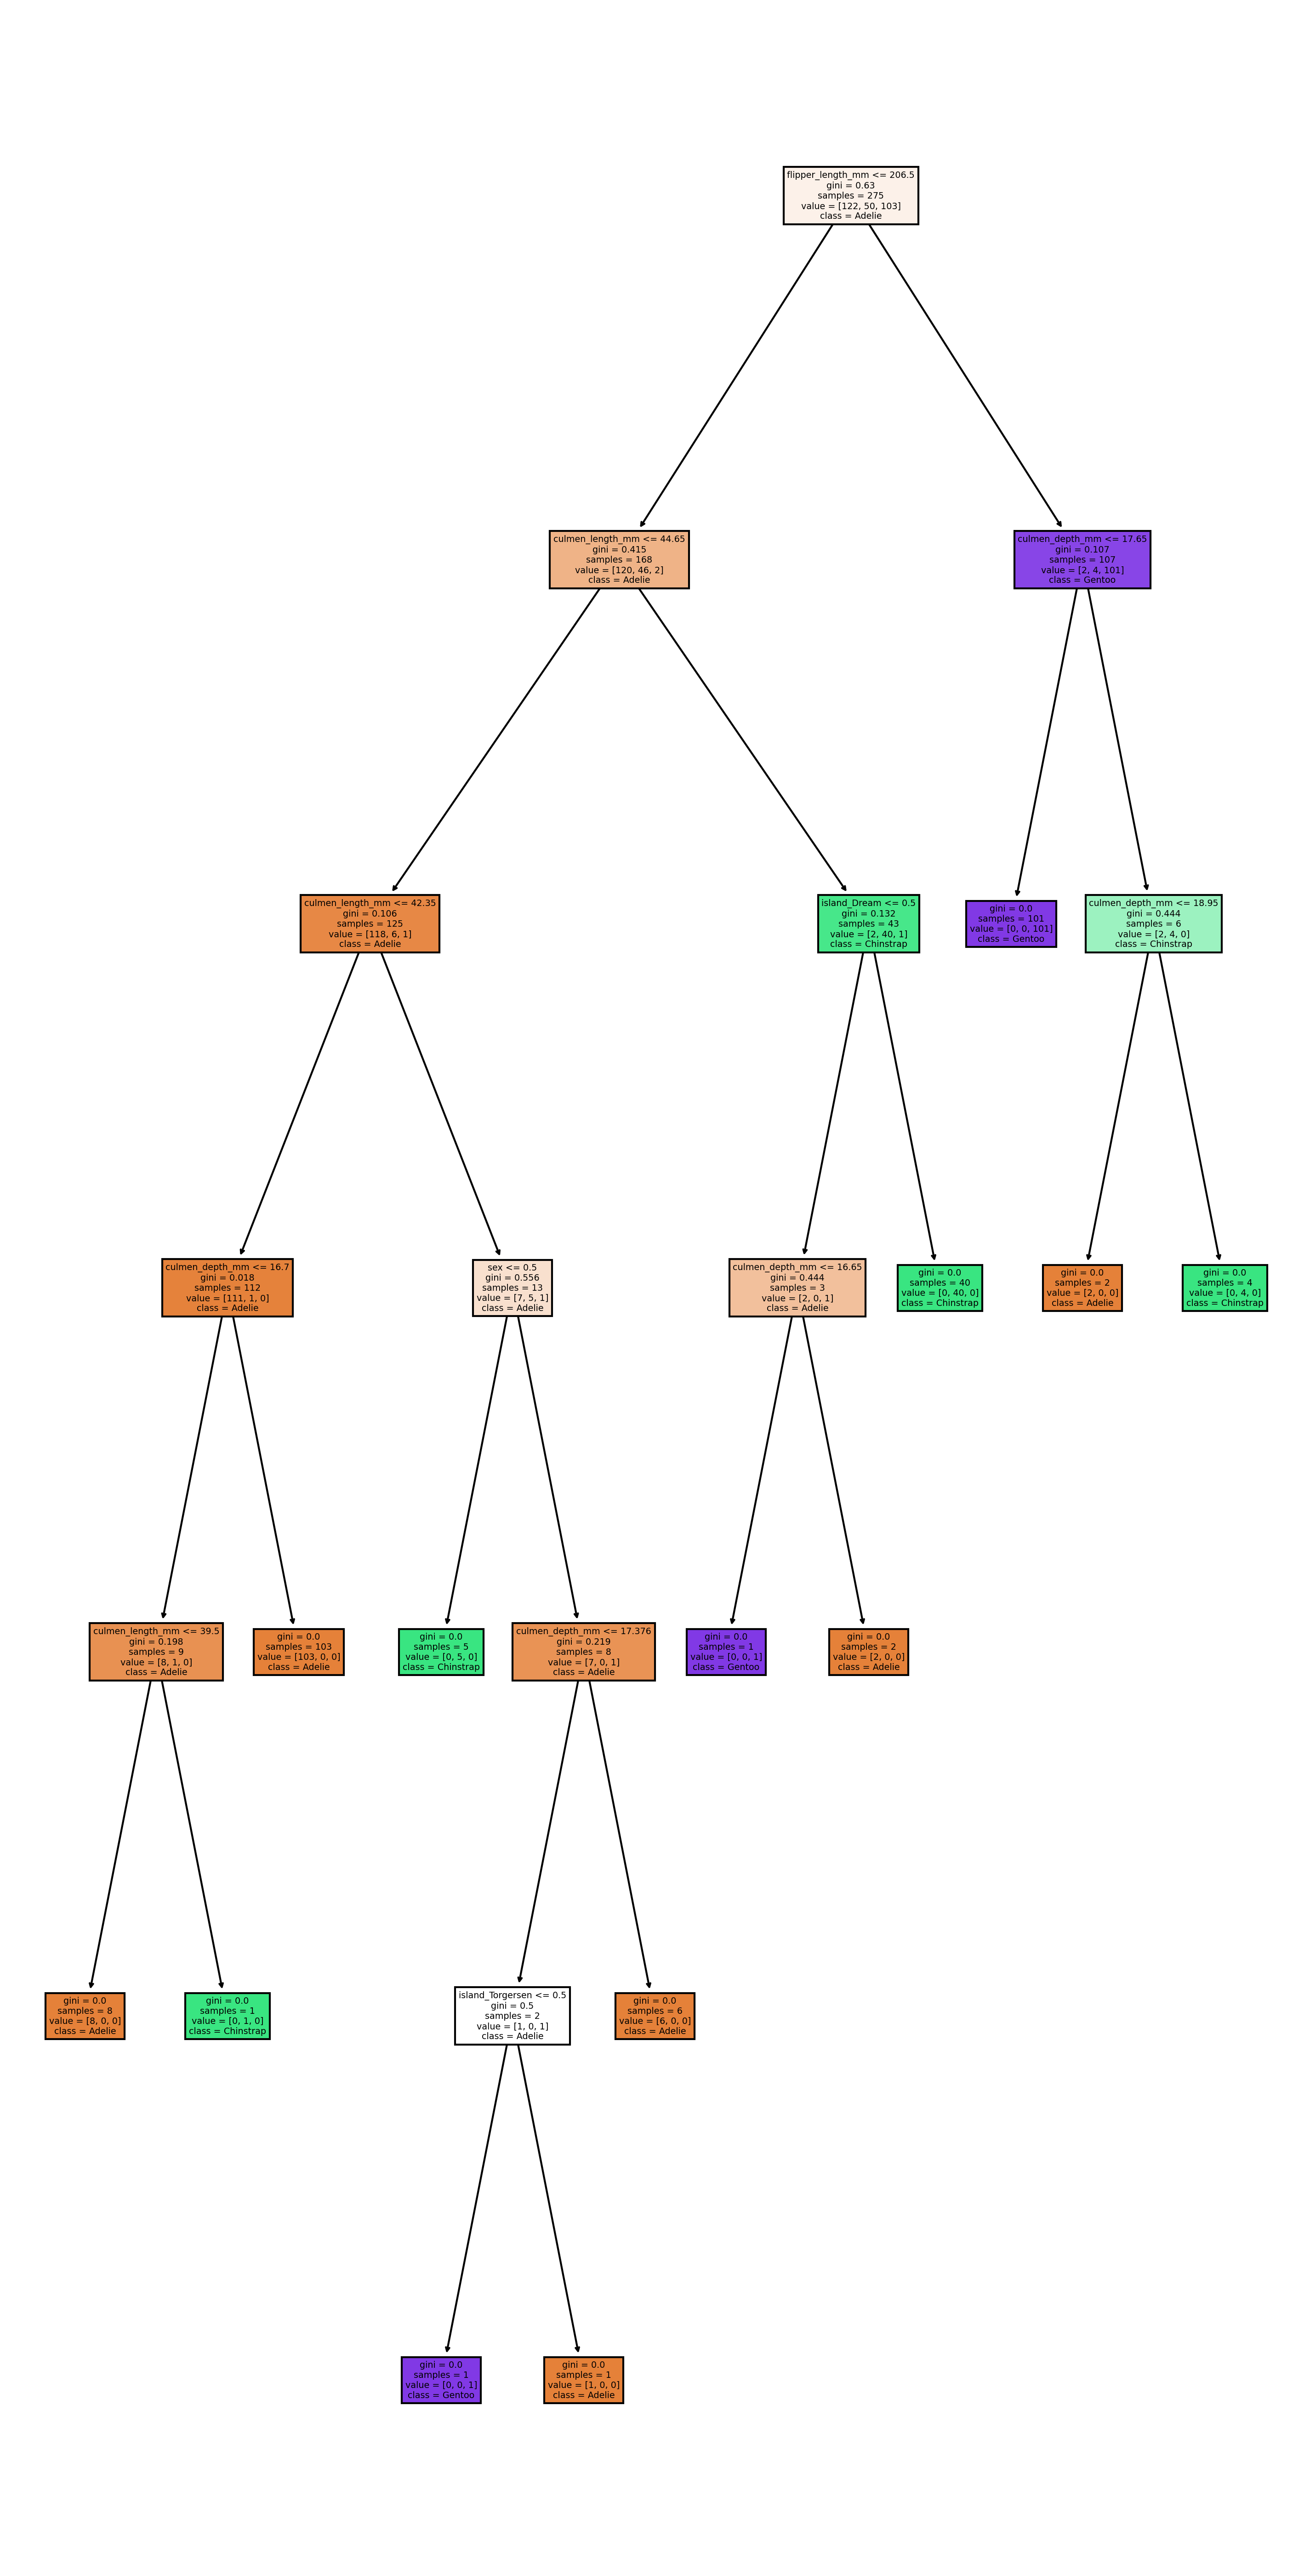

<Figure size 2000x4000 with 0 Axes>

<Figure size 2000x4000 with 0 Axes>

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,24),dpi=300)   # It will increses the Decision Tree size.

plot_tree(model,filled=True,
          feature_names=["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","island_Dream","island_Torgersen","sex"],
          class_names=['Adelie','Chinstrap','Gentoo'])    # It will plot the Decision Tree for given feature_names and class_names.
plt.show()


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
grid_param = {"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5]}   # grid_param is a dictionary having 'criterion' , 'max_depth' as the keys 
                                                                        # and ["gini","entropy"] , [1,2,3,4,5] as key-values resp.
dt_classifier = GridSearchCV(estimator,grid_param,cv=5,scoring="accuracy")  # It will collect the best values of criterion & max_depth hyperparameters

dt_classifier.fit(X_train,y_train)   # It will check internally,that the df_classifier has got the best hyperparameters values or not by training the model on train data
dt_classifier.best_params_           # It will give best hyperparameters 


{'criterion': 'gini', 'max_depth': 4}

In [95]:
dt_classifier.best_estimator_  # It will give the best model with best hyperparameters   

DecisionTreeClassifier(max_depth=4)

In [96]:
dt_classifier.best_estimator_.feature_importances_   # It will give the important features for the best model.

array([0.32284005, 0.06884156, 0.55043365, 0.03230072, 0.02558403,
       0.        , 0.        ])

In [97]:
important_features = list(dt_classifier.best_estimator_.feature_importances_)   # Converting to list 
important_features

[0.32284004611404854,
 0.0688415568237082,
 0.5504336508528647,
 0.03230071631460583,
 0.025584029894772785,
 0.0,
 0.0]

In [98]:

# Identifying important columns for best model

feat = pd.DataFrame(important_features,index=X.columns,columns=["Important Features"])  # It will convert the list to DataFrame by taking the original column names from X(train data) as the index names 
                                                                                        # and Important Features as the column name of dataframe.
print(feat)
print("-"*100)
imp_feats = feat[feat["Important Features"]>0]     # It will takes only the important features which have importance > 0
imp_feats_list = imp_feats.index.tolist()          # It coverts the index names i.e. original column names from X(train data) to list
imp_feats_list

                   Important Features
culmen_length_mm             0.322840
culmen_depth_mm              0.068842
flipper_length_mm            0.550434
body_mass_g                  0.032301
island_Dream                 0.025584
island_Torgersen             0.000000
sex_MALE                     0.000000
----------------------------------------------------------------------------------------------------


['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream']

In [100]:
# Final model selection with best hyperparameters and important features.

X = X[imp_feats_list]
print(X)
print("-"*100)
y = df["species"]
print(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=6)

# Modelling : By using the identified best hyperparameters and the important features

from sklearn.tree import DecisionTreeClassifier
final_model = DecisionTreeClassifier(criterion="gini",max_depth=4)
final_model.fit(X_train,y_train)



     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0            39.10000         18.70000         181.000000  3750.000000   
1            39.50000         17.40000         186.000000  3800.000000   
2            40.30000         18.00000         195.000000  3250.000000   
3            43.92193         17.15117         200.915205  4201.754386   
4            36.70000         19.30000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339          43.92193         17.15117         200.915205  4201.754386   
340          46.80000         14.30000         215.000000  4850.000000   
341          50.40000         15.70000         222.000000  5750.000000   
342          45.20000         14.80000         212.000000  5200.000000   
343          49.90000         16.10000         213.000000  5400.000000   

     island_Dream  
0           False  
1           False  
2           False  
3           False  
4          

DecisionTreeClassifier(max_depth=4)

In [103]:
# Predictions : for final model with best hyperparameters and important features

ypred_train = final_model.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)
ypred_train = final_model.predict(X_train)
print("ypred_train:",ypred_train)



ypred_train: ['Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Ad

In [105]:

# Evaluation :

train_acurracy = final_model.score(X_train,y_train)
print("train_accuracy:",train_accuracy)
test_acurracy = final_model.score(X_test,y_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(final_model,X,y,cv=5).mean())

train_accuracy: 1.0
test_accuracy: 1.0
cross_val_score: 0.9679028132992327
